In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

panguna pg
carnarvon au
saint-philippe re
taolanaro mg
parrita cr
dolores ar
upernavik gl
constitucion cl
chernyshevskiy ru
tuktoyaktuk ca
nizhneyansk ru
taolanaro mg
eirunepe br
bluff nz
atar mr
ushuaia ar
moron mn
faanui pf
port elizabeth za
ushuaia ar
bethel us
barrow us
punta arenas cl
grand river south east mu
barentsburg sj
vao nc
caborca mx
havoysund no
nemuro jp
serpong id
pevek ru
katsuura jp
williamsport us
hilo us
mataura pf
ushuaia ar
aubenas fr
esperance au
hithadhoo mv
la sarre ca
ushuaia ar
hithadhoo mv
mezen ru
zachagansk kz
makakilo city us
attawapiskat ca
miraflores co
vaini to
jalu ly
atuona pf
gizo sb
ballina au
nikolskoye ru
srednekolymsk ru
muros es
saint anthony ca
katsuura jp
krasnoselkup ru
russell nz
albany au
salalah om
vaini to
lavrentiya ru
ushuaia ar
georgetown sh
rikitea pf
belaya gora ru
kirkwall gb
punta arenas cl
ribeira grande pt
iralaya hn
bredasdorp za
manokwari id
severo-kurilsk ru
hithadhoo mv
cidreira br
nuuk gl
yulara au
sijunjung id
nikolskoye 

ushuaia ar
hithadhoo mv
rikitea pf
lanzhou cn
fortuna us
touros br
kodiak us
marica br
bengkulu id
punta arenas cl
mataura pf
ilulissat gl
carnarvon au
ambilobe mg
norman wells ca
pangnirtung ca
rikitea pf
rikitea pf
ayan ru
upernavik gl
ponta delgada pt
vasai in
castro cl
saint-louis sn
alyangula au
ban nahin la
cape town za
caravelas br
busselton au
medvedka ru
rikitea pf
chokurdakh ru
castro cl
sarab ir
bosaso so
bugene tz
tuktoyaktuk ca
yershov ru
albany au
oytal kz
jamestown sh
saint-philippe re
saint-philippe re
hermanus za
busselton au
formoso do araguaia br
rikitea pf
tanda ci
maldonado uy
cam ranh vn
kalmunai lk
taolanaro mg
takaka nz
albany au
arraial do cabo br
vao nc
amderma ru
illoqqortoormiut gl
puerto ayora ec
bluff nz
ocos gt
frontera mx
cabo san lucas mx
cape town za
lolua tv
mansoa gw
morant bay jm
seoul kr
lavrentiya ru
arraial do cabo br
port moresby pg
saldanha za
esperance au
kapaa us
kaitangata nz
porosozero ru
kieta pg
dikson ru
carnarvon au
dingle ie
aykhal ru


hermanus za
nikolskoye ru
carnarvon au


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=302b37f99151e7a3392d87b0c9c3f40e


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | panguna
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | parrita
Processing Record 6 of Set 1 | dolores
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | chernyshevskiy
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | eirunepe
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | atar
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | moron
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | punta arenas
Processing Record

Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | surt
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | mendahara
City not found. Skipping...
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | atbasar
Processing Record 43 of Set 4 | newport
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | dongsheng
Processing Record 48 of Set 4 | perth
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | mecca
Processing Record 1 of Set 5 | warqla
City not found. Skipping...
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | carauari
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | viligili
City not found. Skipping...
Processing Record 6 of Set 5 | allapalli
Processing Record 7 of Set 5 | iguape
Processing Record 8 of Set 5 | taltal
Processing Record 9 of Set 5 | geraldton
P

Processing Record 28 of Set 8 | gumdag
Processing Record 29 of Set 8 | tyup
Processing Record 30 of Set 8 | suzaka
Processing Record 31 of Set 8 | alekseyevskaya
Processing Record 32 of Set 8 | lashio
Processing Record 33 of Set 8 | umm lajj
Processing Record 34 of Set 8 | wilmington
Processing Record 35 of Set 8 | bodden town
Processing Record 36 of Set 8 | rancho palos verdes
Processing Record 37 of Set 8 | xichang
Processing Record 38 of Set 8 | dangara
Processing Record 39 of Set 8 | preobrazheniye
Processing Record 40 of Set 8 | tarabha
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | bumba
Processing Record 43 of Set 8 | jaque
Processing Record 44 of Set 8 | freeport
Processing Record 45 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | waiouru
Processing Record 48 of Set 8 | ola
Processing Record 49 of Set 8 | leh
Processing Record 50 of Set 8 | shingu
Processing Record 1 of Set 9 | isa

Processing Record 15 of Set 12 | manati
Processing Record 16 of Set 12 | khed brahma
Processing Record 17 of Set 12 | banjar
Processing Record 18 of Set 12 | alberton
Processing Record 19 of Set 12 | angra
City not found. Skipping...
Processing Record 20 of Set 12 | mackay
Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | carballo
Processing Record 23 of Set 12 | nianzishan
Processing Record 24 of Set 12 | maryville
Processing Record 25 of Set 12 | port blair
Processing Record 26 of Set 12 | bud
Processing Record 27 of Set 12 | santo antonio do sudoeste
Processing Record 28 of Set 12 | imeni poliny osipenko
Processing Record 29 of Set 12 | kaka
Processing Record 30 of Set 12 | lasa
Processing Record 31 of Set 12 | shelburne
Processing Record 32 of Set 12 | cedar city
Processing Record 33 of Set 12 | paradwip
City not found. Skipping...
Processing Record 34 of Set 12 | margarita
Processing Record 35 of Set 12 | dakoro
Processing Record 36 of Set 12 | kansanshi
Proc

In [21]:
print(city_data)

[{'City': 'Panguna', 'Lat': -6.3164, 'Lng': 155.4848, 'Max Temp': 71.49, 'Humidity': 90, 'Cloudiness': 97, 'Wind Speed': 1.52, 'Country': 'PG', 'Date': '2022-03-08 20:34:28'}, {'City': 'Carnarvon', 'Lat': -24.8667, 'Lng': 113.6333, 'Max Temp': 75.27, 'Humidity': 60, 'Cloudiness': 0, 'Wind Speed': 8.05, 'Country': 'AU', 'Date': '2022-03-08 20:34:28'}, {'City': 'Saint-Philippe', 'Lat': -21.3585, 'Lng': 55.7679, 'Max Temp': 78.39, 'Humidity': 84, 'Cloudiness': 58, 'Wind Speed': 10.42, 'Country': 'RE', 'Date': '2022-03-08 20:32:25'}, {'City': 'Parrita', 'Lat': 9.5201, 'Lng': -84.3225, 'Max Temp': 98.26, 'Humidity': 59, 'Cloudiness': 6, 'Wind Speed': 7.65, 'Country': 'CR', 'Date': '2022-03-08 20:34:29'}, {'City': 'Dolores', 'Lat': -36.3132, 'Lng': -57.6792, 'Max Temp': 72.97, 'Humidity': 57, 'Cloudiness': 0, 'Wind Speed': 9.31, 'Country': 'AR', 'Date': '2022-03-08 20:34:29'}, {'City': 'Upernavik', 'Lat': 72.7868, 'Lng': -56.1549, 'Max Temp': -4.88, 'Humidity': 92, 'Cloudiness': 85, 'Wind Sp

In [22]:
len(city_data)

559

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Panguna,-6.3164,155.4848,71.49,90,97,1.52,PG,2022-03-08 20:34:28
1,Carnarvon,-24.8667,113.6333,75.27,60,0,8.05,AU,2022-03-08 20:34:28
2,Saint-Philippe,-21.3585,55.7679,78.39,84,58,10.42,RE,2022-03-08 20:32:25
3,Parrita,9.5201,-84.3225,98.26,59,6,7.65,CR,2022-03-08 20:34:29
4,Dolores,-36.3132,-57.6792,72.97,57,0,9.31,AR,2022-03-08 20:34:29
5,Upernavik,72.7868,-56.1549,-4.88,92,85,5.48,GL,2022-03-08 20:34:29
6,Constitucion,-35.3333,-72.4167,64.56,66,0,8.01,CL,2022-03-08 20:34:29
7,Chernyshevskiy,63.0128,112.4714,1.53,87,100,11.10,RU,2022-03-08 20:34:30
8,Tuktoyaktuk,69.4541,-133.0374,-4.00,84,75,3.44,CA,2022-03-08 20:34:30
9,Eirunepe,-6.6603,-69.8736,79.27,89,72,3.22,BR,2022-03-08 20:34:31


In [16]:
# Changing the column order.
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Panguna,PG,2022-03-08 20:34:28,-6.3164,155.4848,71.49,90,97,1.52
1,Carnarvon,AU,2022-03-08 20:34:28,-24.8667,113.6333,75.27,60,0,8.05
2,Saint-Philippe,RE,2022-03-08 20:32:25,-21.3585,55.7679,78.39,84,58,10.42
3,Parrita,CR,2022-03-08 20:34:29,9.5201,-84.3225,98.26,59,6,7.65
4,Dolores,AR,2022-03-08 20:34:29,-36.3132,-57.6792,72.97,57,0,9.31
5,Upernavik,GL,2022-03-08 20:34:29,72.7868,-56.1549,-4.88,92,85,5.48
6,Constitucion,CL,2022-03-08 20:34:29,-35.3333,-72.4167,64.56,66,0,8.01
7,Chernyshevskiy,RU,2022-03-08 20:34:30,63.0128,112.4714,1.53,87,100,11.10
8,Tuktoyaktuk,CA,2022-03-08 20:34:30,69.4541,-133.0374,-4.00,84,75,3.44
9,Eirunepe,BR,2022-03-08 20:34:31,-6.6603,-69.8736,79.27,89,72,3.22


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

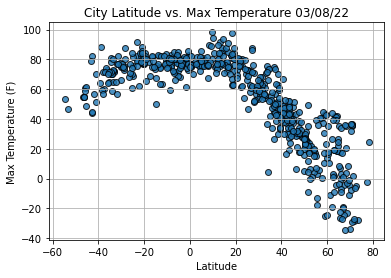

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

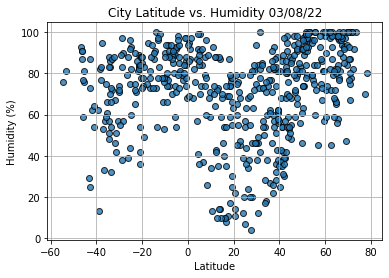

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

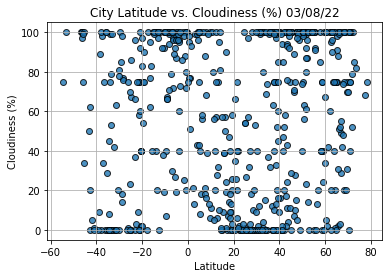

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

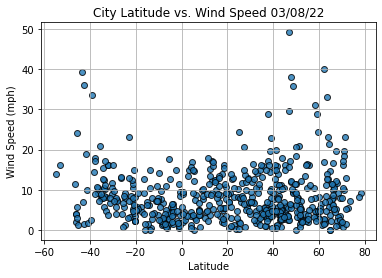

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()